## Final Capstone Prjoect


In [1]:
#import libraries to build potential neighborhood dataframes

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
#Fourspqaure user data

CLIENT_ID = 'M23BSER3IM3J3N3FJYKD141OL1MKKG5AB2PCJLLEHBID0L45' # your Foursquare ID
CLIENT_SECRET = 'BGD5VICJF5ZYVJSSZVVZJ5CUWMEMB21QXIQ1A0ZRCVF4WI11' # your Foursquare Secret
VERSION = '20200107'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M23BSER3IM3J3N3FJYKD141OL1MKKG5AB2PCJLLEHBID0L45
CLIENT_SECRET:BGD5VICJF5ZYVJSSZVVZJ5CUWMEMB21QXIQ1A0ZRCVF4WI11


### Read Portland Neigbhorhood CSV

In [3]:
df_prt = pd.read_csv('https://opendata.arcgis.com/datasets/9f50a605cf4945259b983fa35c993fe9_125.csv?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D&session=919074215.1577714578')
df_prt.head()

,OBJECTID,NAME,COMMPLAN,SHARED,COALIT,HORZ_VERT,MAPLABEL,ID,Shape_Length,Shape_Area
0,1,CATHEDRAL PARK,,,NPNS,HORZ,Cathedral Park,31,11434.254777,5.424298e+06
1,2,UNIVERSITY PARK,,,NPNS,HORZ,University Park,88,11950.859827,6.981457e+06
2,3,PIEDMONT,ALBINA,,NPNS,VERT,Piedmont,70,10849.327392,6.079530e+06
3,4,WOODLAWN,ALBINA,,NECN,HORZ,Woodlawn,93,8078.360994,3.870554e+06
4,5,CULLY ASSOCIATION OF NEIGHBORS,,,CNN,HORZ,Cully Association of Neighbors,23,18179.392090,1.658062e+07


In [4]:
df_prt.shape

(98, 10)

In [7]:
#define neighborhood dataframe
df_prt_neigh = pd.DataFrame(columns = ['Neighborhood', 'Address', 'Latitude', 'Longitude'])

#Add location data and clean up list

geolocator = Nominatim(user_agent="foursquare_agent")

for neigh in df_prt['NAME']:
    address = neigh+', Portland, Oregon'
    location = geolocator.geocode(address)
    if location != None:
        latitude = location.latitude
        longitude = location.longitude
        df_prt_neigh = df_prt_neigh.append({'Neighborhood': neigh,
                                            'Address': address,
                                            'Latitude': latitude,
                                            'Longitude': longitude}, ignore_index=True)
                                                   

df_prt_neigh.head()

,Neighborhood,Address,Latitude,Longitude
0,CATHEDRAL PARK,"CATHEDRAL PARK, Portland, Oregon",45.587636,-122.758640
1,CATHEDRAL PARK,"CATHEDRAL PARK, Portland, Oregon",45.587636,-122.758640
2,UNIVERSITY PARK,"UNIVERSITY PARK, Portland, Oregon",45.577809,-122.728977
3,PIEDMONT,"PIEDMONT, Portland, Oregon",45.574552,-122.669405
4,WOODLAWN,"WOODLAWN, Portland, Oregon",45.571983,-122.652380


In [17]:
df_prt_neigh.shape

(76, 4)

In [18]:
print('There are {} uniques neighborhoods.'.format(len(df_prt_neigh['Neighborhood'].unique())))

There are 76 uniques neighborhoods.


### Read Seattle Neighborhood CSV

In [19]:
df_sea = pd.read_csv('https://opendata.arcgis.com/datasets/b76cdd45f7b54f2a96c5e97f2dda3408_2.csv?session=919074215.1577714578')
df_sea.head()

,OBJECTID,PERIMETER,S_HOOD,L_HOOD,L_HOODID,SYMBOL,SYMBOL2,AREA,HOODS_,HOODS_ID,SHAPE_Length,SHAPE_Area
0,1,617.843,OOO,,0,0,0,3588.443,2,0,617.842614,3588.442385
1,2,733.568,OOO,,0,0,0,22294.777,3,0,733.568416,22294.781706
2,3,4088.442,OOO,,0,0,0,56695.367,5,0,4088.441739,56695.357490
3,4,1809.446,OOO,,0,0,0,64156.813,6,0,1809.445748,64156.821780
4,5,250.330,OOO,,0,0,0,2993.164,7,0,250.330362,2993.161328


In [25]:
#define neighborhood dataframe
df_sea_neigh = pd.DataFrame(columns = ['Neighborhood', 'Address', 'Latitude', 'Longitude'])

#Add location data and clean up list

geolocator = Nominatim(user_agent="foursquare_agent")

for neigh in df_sea['S_HOOD']:
    if neigh != 'OOO':
        if neigh != "":
            if neigh != ' ':
                address = neigh+', Seattle, Washington'
                location = geolocator.geocode(address)
                if location != None:
                    latitude = location.latitude
                    longitude = location.longitude
                    
                    df_sea_neigh = df_sea_neigh.append({'Neighborhood': neigh,
                                                        'Address': address,
                                                        'Latitude': latitude,
                                                        'Longitude': longitude}, ignore_index=True)
                                                   

df_sea_neigh.head()

,Neighborhood,Address,Latitude,Longitude
0,Loyal Heights,"Loyal Heights, Seattle, Washington",47.688709,-122.392907
1,Adams,"Adams, Seattle, Washington",47.565300,-122.272014
2,Whittier Heights,"Whittier Heights, Seattle, Washington",47.683297,-122.371449
3,Phinney Ridge,"Phinney Ridge, Seattle, Washington",47.672131,-122.354031
4,Wallingford,"Wallingford, Seattle, Washington",47.659463,-122.334342


In [26]:
df_sea_neigh.shape

(86, 4)

In [27]:
print('There are {} uniques neighborhoods.'.format(len(df_sea_neigh['Neighborhood'].unique())))

There are 86 uniques neighborhoods.


## Mapping the neighborhoods in both Portland and Seattle

In [28]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         704 KB

The following NEW packages will be INSTALLED:

    altair:  4.0.0-py_0 conda-forge
    branca:  0.3.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


vincent-0.4.4        | 28 KB     | ##################################### | 1

### Portland Map

In [29]:
geolocator = Nominatim(user_agent="foursquare_agent")
location_prt = geolocator.geocode('Portland, Oregon')
latitude_prt = location_prt.latitude
longitude_prt = location_prt.longitude

print('Portland latitude is: ', latitude_prt)
print('Portland Longitude is: ', longitude_prt)

Portland latitude is:  45.5202471
Portland Longitude is:  -122.6741949


In [163]:

# create map of Portland using latitude and longitude values
map_portland = folium.Map(location=[latitude_prt, longitude_prt], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_prt_neigh['Latitude'], df_prt_neigh['Longitude'], df_prt_neigh['Neighborhood']):
    label = folium.Popup(neighborhood, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_portland)
    folium.Circle(
        [lat, lng],
        radius = 500).add_to(map_portland) 
    
map_portland

#### Looks like we are missing a few neighborhoods. Let's add them in.
#### We can also increase the circle radius to 750m to get better coverage.

In [30]:
#Create df of missing neighborhoods based on visual inspection of above map
missing_neigh = {'Neighborhood':['Cully', "Irvington", 'Sabin', 'Buckman', 'Hosford-Abernethy', 'Brooklyn', 'Sellwood-Moreland', 'Southwest Hills', 'Old Town', 'Northwest District', 'Waverly Heights', 'Lloyd District', 'Goose Hollow']}
df_prt_miss = pd.DataFrame(data=missing_neigh)
df_prt_miss

,Neighborhood
0,Cully
1,Irvington
2,Sabin
3,Buckman
4,Hosford-Abernethy
5,Brooklyn
6,Sellwood-Moreland
7,Southwest Hills
8,Old Town
9,Northwest District


In [36]:
#add neighborhoods to Portland dataframe

geolocator = Nominatim(user_agent="foursquare_agent")

for neigh in df_prt_miss['Neighborhood']:
    address = neigh+', Portland, Oregon'
    location = geolocator.geocode(address)
    if location != None:
        latitude = location.latitude
        longitude = location.longitude
        df_prt_neigh = df_prt_neigh.append({'Neighborhood': neigh,
                                            'Address': address,
                                            'Latitude': latitude,
                                            'Longitude': longitude}, ignore_index=True)
                                                   

df_prt_neigh.tail(13)

,Neighborhood,Address,Latitude,Longitude
76,Cully,"Cully, Portland, Oregon",45.561546,-122.602080
77,Irvington,"Irvington, Portland, Oregon",45.541983,-122.648938
78,Sabin,"Sabin, Portland, Oregon",45.551773,-122.649480
79,Buckman,"Buckman, Portland, Oregon",45.517381,-122.651954
80,Hosford-Abernethy,"Hosford-Abernethy, Portland, Oregon",45.506644,-122.649419
81,Brooklyn,"Brooklyn, Portland, Oregon",45.494819,-122.651552
82,Sellwood-Moreland,"Sellwood-Moreland, Portland, Oregon",45.471488,-122.651430
83,Southwest Hills,"Southwest Hills, Portland, Oregon",45.502274,-122.713288
84,Old Town,"Old Town, Portland, Oregon",45.524934,-122.673516
85,Northwest District,"Northwest District, Portland, Oregon",45.533013,-122.698845


In [37]:
print('There are {} uniques neighborhoods.'.format(len(df_prt_neigh['Neighborhood'].unique())))

There are 89 uniques neighborhoods.


In [38]:
#check for duplicates if needed
#df_prt_neigh.groupby('Neighborhood').count().sort_values('Address', ascending = False).head(10)

#### Repeat Portland Map

In [164]:

# create map of Portland using latitude and longitude values
map_portland = folium.Map(location=[latitude_prt, longitude_prt], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_prt_neigh['Latitude'], df_prt_neigh['Longitude'], df_prt_neigh['Neighborhood']):
    label = folium.Popup(neighborhood, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_portland)
    folium.Circle(
        [lat, lng],
        radius = 750).add_to(map_portland)  
    
map_portland

#### That looks better. Let's move on.

### Seattle Map

In [39]:
geolocator = Nominatim(user_agent="foursquare_agent")
location_sea = geolocator.geocode('Seattle, Washington')
latitude_sea = location_sea.latitude
longitude_sea = location_sea.longitude

print('Seattle latitude is: ', latitude_sea)
print('Seattle Longitude is: ', longitude_sea)

Seattle latitude is:  47.6038321
Seattle Longitude is:  -122.3300624


In [165]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude_sea, longitude_sea], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_sea_neigh['Latitude'], df_sea_neigh['Longitude'], df_sea_neigh['Neighborhood']):
    label = folium.Popup(neighborhood, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)
    folium.Circle(
        [lat, lng],
        radius = 500).add_to(map_seattle)
    
map_seattle

#### Looks like we have better coverage than the first Portland map. However, we seem to be a few, so lets add them in.
#### Also, the 500 m radius circles seem to leave some of the neighborhoods outside of downtown uncovered, so let's increase the radius of those circles to 750 m.

In [40]:
#Create df of missing neighborhoods based on visual inspection of above map

missing_neigh = {'Neighborhood':['Capitol Hill', 'Washington Park', 'Central District', 'Madison Valley', 'SODO',]}
df_sea_miss = pd.DataFrame(data=missing_neigh)
df_sea_miss

,Neighborhood
0,Capitol Hill
1,Washington Park
2,Central District
3,Madison Valley
4,SODO


In [41]:
#add neighborhoods to Seattle dataframe

geolocator = Nominatim(user_agent="foursquare_agent")

for neigh in df_sea_miss['Neighborhood']:
    address = neigh+', Seattle, Washington'
    location = geolocator.geocode(address)
    if location != None:
        latitude = location.latitude
        longitude = location.longitude
        df_sea_neigh = df_sea_neigh.append({'Neighborhood': neigh,
                                            'Address': address,
                                            'Latitude': latitude,
                                            'Longitude': longitude}, ignore_index=True)
                                                   

df_sea_neigh.tail(5)

,Neighborhood,Address,Latitude,Longitude
86,Capitol Hill,"Capitol Hill, Seattle, Washington",47.623831,-122.318369
87,Washington Park,"Washington Park, Seattle, Washington",47.627567,-122.287486
88,Central District,"Central District, Seattle, Washington",47.603110,-122.308270
89,Madison Valley,"Madison Valley, Seattle, Washington",47.619916,-122.295614
90,SODO,"SODO, Seattle, Washington",47.581262,-122.327431


In [42]:
print('There are {} uniques neighborhoods.'.format(len(df_sea_neigh['Neighborhood'].unique())))

There are 91 uniques neighborhoods.


In [ ]:
#check for duplicates if needed
#df_sea_neigh.groupby('Neighborhood').count().sort_values('Address', ascending = False).head(10)

#### Repeat Seattle Map

In [166]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude_sea, longitude_sea], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_sea_neigh['Latitude'], df_sea_neigh['Longitude'], df_sea_neigh['Neighborhood']):
    label = folium.Popup(neighborhood, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)
    folium.Circle(
        [lat, lng],
        radius = 750).add_to(map_seattle)
    
map_seattle

### Combine Portland, Seattle, Hampden, and Decatur neighborhoods and get venues

In [47]:
#creat dataframe of all potential west coast neighborhoods
df_wc = df_prt_neigh.append(df_sea_neigh, ignore_index=True)
df_wc.shape

(180, 4)

In [48]:
#add Hampden and Decatur to make list of all neighborhoods
df_all = df_wc.append({'Neighborhood':'Hampden', 'Address':'Hampden, Baltimore, Maryland', 'Latitude': latitude_bal, 'Longitude': longitude_bal}, ignore_index=True)
df_all = df_all.append({'Neighborhood':'Decatur', 'Address':'Decatur, Georgia', 'Latitude': latitude_dec, 'Longitude': longitude_dec}, ignore_index=True)
df_all.tail()

,Neighborhood,Address,Latitude,Longitude
177,Central District,"Central District, Seattle, Washington",47.603110,-122.308270
178,Madison Valley,"Madison Valley, Seattle, Washington",47.619916,-122.295614
179,SODO,"SODO, Seattle, Washington",47.581262,-122.327431
180,Hampden,"Hampden, Baltimore, Maryland",39.330940,-76.634969
181,Decatur,"Decatur, Georgia",33.773758,-84.296069


In [45]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [101]:
#function to return nearby venues for all neighborhoods in dataframe
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue ID']
    
    return(nearby_venues)

In [102]:
#getting venues for all neighborhoods
limit=100
all_venues = getNearbyVenues(names=df_all['Neighborhood'],
                            latitudes=df_all['Latitude'],
                            longitudes=df_all['Longitude']
                                  )

CATHEDRAL PARK
UNIVERSITY PARK
PIEDMONT
WOODLAWN
ARBOR LODGE
OVERLOOK
CONCORDIA
PARKROSE
HUMBOLDT
KING
VERNON
NORTHWEST HEIGHTS
ROSE CITY PARK
RUSSELL
PEARL DISTRICT
WOODLAND PARK
MONTAVILLA
LAURELHURST
KERNS
NORTH TABOR
GLENFAIR
PORTLAND DOWNTOWN
MT. TABOR
SUNNYSIDE
SOUTH PORTLAND
HOMESTEAD
SOUTH TABOR
CRESTON-KENILWORTH
HILLSDALE
FOSTER-POWELL
MT. SCOTT-ARLETA
HAYHURST
MAPLEWOOD
MULTNOMAH
BRENTWOOD-DARLINGTON
SOUTH BURLINGAME
MARKHAM
MARSHALL PARK
COLLINS VIEW
WEST PORTLAND PARK
ARNOLD CREEK
FAR SOUTHWEST
LINNTON
SYLVAN-HIGHLANDS
ARLINGTON HEIGHTS
ASHCREEK
CRESTWOOD
ARDENWALD-JOHNSON CREEK
WOODSTOCK
EASTMORELAND
REED
PLEASANT VALLEY
POWELLHURST-GILBERT
LENTS
HAZELWOOD
MILL PARK
ARGAY TERRACE
MADISON SOUTH
ROSEWAY
BEAUMONT-WILSHIRE
HOLLYWOOD
ALAMEDA
BOISE
ELIOT
BRIDLEMILE
HEALY HEIGHTS
SULLIVAN'S GULCH
GRANT PARK
RICHMOND
FOREST PARK
HILLSIDE
ST. JOHNS
KENTON
PORTSMOUTH
BRIDGETON
EAST COLUMBIA
Cully
Irvington
Sabin
Buckman
Hosford-Abernethy
Brooklyn
Sellwood-Moreland
Southwest Hills
O

In [103]:
print(all_venues.shape)
all_venues.head()

(6714, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,CATHEDRAL PARK,45.587636,-122.75864,Cathedral Park,45.587744,-122.759822,Park,4a49b0cef964a5207eab1fe3
1,CATHEDRAL PARK,45.587636,-122.75864,Occidental Wursthaus,45.588864,-122.761344,German Restaurant,57abe7f0cd10a2bea53011c2
2,CATHEDRAL PARK,45.587636,-122.75864,Occidental Brewing Company,45.588807,-122.761680,Brewery,4e473c9e483b03d090ec356c
3,CATHEDRAL PARK,45.587636,-122.75864,Hoplandia Beer,45.589662,-122.755614,Beer Store,56451f72498eefbc4ff94f75
4,CATHEDRAL PARK,45.587636,-122.75864,Taqueria Y Panaderia Santa Cruz,45.590201,-122.755332,Mexican Restaurant,4ae10539f964a520aa8421e3


In [104]:
#list venue count in each neighborhood descending
all_venues.groupby('Neighborhood').count().sort_values('Venue', ascending = False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
Neighborhood,,,,,,,
Belltown,100,100,100,100,100,100,100
International District,100,100,100,100,100,100,100
Northwest District,100,100,100,100,100,100,100
Capitol Hill,100,100,100,100,100,100,100
University District,100,100,100,100,100,100,100
First Hill,100,100,100,100,100,100,100
Buckman,100,100,100,100,100,100,100
Lower Queen Anne,100,100,100,100,100,100,100
Broadway,100,100,100,100,100,100,100


In [105]:
print('There are {} uniques categories.'.format(len(all_venues['Venue Category'].unique())))

There are 401 uniques categories.


### Neighborhood Clustering with K-means

In [55]:
from sklearn.cluster import KMeans

In [56]:
#one hot encoding
all_onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
all_onehot['Neighborhood'] = all_venues['Neighborhood'] 

all_onehot.head()

,ATM,Accessories Store,Acupuncturist,Adult Boutique,African Restaurant,Airport,American Restaurant,Amphitheater,Antique Shop,Arcade,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
all_onehot.shape

(6714, 401)

In [58]:
#Dermine mean number of venue type per neighborhood
all_grouped = all_onehot.groupby('Neighborhood').mean().reset_index()
all_grouped.head()

,Neighborhood,ATM,Accessories Store,Acupuncturist,Adult Boutique,African Restaurant,Airport,American Restaurant,Amphitheater,Antique Shop,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,ALAMEDA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ARBOR LODGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ARDENWALD-JOHNSON CREEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ARGAY TERRACE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ARLINGTON HEIGHTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032258,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
all_grouped.shape

(182, 401)

In [60]:
#define function to list the most common type of venue 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
#Determine the most common type of venue for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = all_grouped['Neighborhood']

for ind in np.arange(all_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(all_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALAMEDA,Bus Line,Italian Restaurant,Coffee Shop,Soccer Field,Optical Shop,Garden Center,Zoo Exhibit,Farmers Market,Event Space,Exhibit
1,ARBOR LODGE,Convenience Store,Bus Stop,Mexican Restaurant,Coffee Shop,Video Store,Bar,Park,Theater,Supermarket,Gift Shop
2,ARDENWALD-JOHNSON CREEK,Food & Drink Shop,Volleyball Court,Grocery Store,Tennis Court,Trail,Coffee Shop,Café,Park,Convenience Store,Fish & Chips Shop
3,ARGAY TERRACE,Thai Restaurant,Mobile Phone Shop,Mexican Restaurant,Optical Shop,Farmers Market,Arts & Crafts Store,Warehouse Store,Video Store,Convenience Store,Flea Market
4,ARLINGTON HEIGHTS,Park,Trail,Garden,Gift Shop,Playground,Train Station,Botanical Garden,Café,Field,Bus Station


In [62]:
neighborhoods_venues_sorted.shape

(182, 11)

In [64]:
#remove Neighborhood column for KMeans
all_grouped_clustering = all_grouped.drop('Neighborhood', 1)

In [63]:
#import to plot for elbow point
import matplotlib.pyplot as plt  
from matplotlib import style

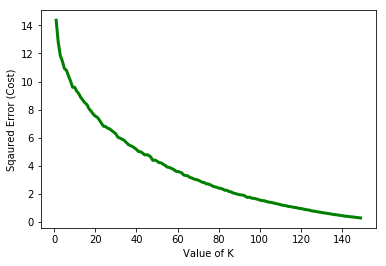

[14.36544153637476,
 12.797726292608752,
 11.862593992237402,
 11.452874235287114,
 10.920756408872913,
 10.79757419863936,
 10.39636726693139,
 10.027898020750271,
 9.588303164597734,
 9.590204191981538,
 9.312687227212942,
 9.129295670794079,
 8.855135113106565,
 8.669308306706254,
 8.476325957081562,
 8.349524698197083,
 8.045709739355706,
 7.89064398963678,
 7.680737551585663,
 7.5373823184469915,
 7.451532979392085,
 7.2615329793920855,
 7.026810892761004,
 6.816478128478262,
 6.793291462801098,
 6.67304810502581,
 6.6253635042211085,
 6.505186035085306,
 6.3965521063006925,
 6.272841135593915,
 6.029727357902458,
 5.966503727555628,
 5.892586111886431,
 5.816741635689037,
 5.674834649062959,
 5.523506286332269,
 5.4333364359765355,
 5.377372776441412,
 5.279608471523337,
 5.170061504835383,
 5.014645755914113,
 4.995825042397398,
 4.906875073717609,
 4.772450324360199,
 4.7872156615167905,
 4.742966059707601,
 4.61864633912885,
 4.376154091432427,
 4.405890414523457,
 4.331161239

In [66]:
#Optimize KMeans by attempting elbow method

cost =[] 
for i in range(1, 150): 
    KM = KMeans(n_clusters = i, max_iter = 500, random_state=0) 
    KM.fit(all_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 150), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the most optimal value for choosing k 

cost

In [67]:
# set number of clusters, the elbow point isn't terribly obvious, but at around 30 seems reasonable
kclusters = 30

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([ 6,  0,  1,  0,  1,  2, 15, 10, 28, 18, 26, 25, 25,  1, 10, 27,  6,
       26,  1,  8,  0,  8, 25, 26, 25, 28, 28, 25, 28, 26, 28, 26,  6,  8,
       25, 25, 16, 25, 28, 25, 29, 28, 26, 26,  6, 13,  8, 28, 10,  6, 28,
        0, 11,  1, 28, 28, 28,  1, 28, 28, 26, 26, 26, 14, 11, 28, 28, 28,
       25,  3, 11, 28,  0,  8, 25,  8,  8, 26, 28, 25, 25, 26,  0,  0, 26,
        1,  1, 25, 28,  0,  8, 20, 26, 17,  0, 11, 28,  6, 25, 25, 11, 28,
        6, 28, 14, 24,  6,  1,  8, 28, 22, 28,  9, 28, 25,  4, 26,  6, 25,
        6, 11, 16, 25, 25, 21,  6, 25,  0,  7,  8,  6,  6, 10, 26, 25, 25,
       11, 23, 26, 26, 26,  5, 25, 28, 26, 26, 26,  8, 19, 25, 28,  0, 28,
       26, 25, 25,  1,  4, 28, 28, 26,  7,  8, 25, 25, 11, 25, 28,  2, 28,
       25, 28, 25, 11, 26, 28, 11, 26,  6, 25, 12,  8], dtype=int32)

In [68]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.shape

(182, 12)

In [69]:
#visually check 
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6,ALAMEDA,Bus Line,Italian Restaurant,Coffee Shop,Soccer Field,Optical Shop,Garden Center,Zoo Exhibit,Farmers Market,Event Space,Exhibit
1,0,ARBOR LODGE,Convenience Store,Bus Stop,Mexican Restaurant,Coffee Shop,Video Store,Bar,Park,Theater,Supermarket,Gift Shop
2,1,ARDENWALD-JOHNSON CREEK,Food & Drink Shop,Volleyball Court,Grocery Store,Tennis Court,Trail,Coffee Shop,Café,Park,Convenience Store,Fish & Chips Shop
3,0,ARGAY TERRACE,Thai Restaurant,Mobile Phone Shop,Mexican Restaurant,Optical Shop,Farmers Market,Arts & Crafts Store,Warehouse Store,Video Store,Convenience Store,Flea Market
4,1,ARLINGTON HEIGHTS,Park,Trail,Garden,Gift Shop,Playground,Train Station,Botanical Garden,Café,Field,Bus Station


In [75]:
# check for Hampden cluster
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood'] == 'Hampden']


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,25,Hampden,Pizza Place,American Restaurant,Food Truck,Italian Restaurant,Bar,Bakery,Gift Shop,Art Gallery,Record Shop,Boutique


In [76]:
#check for dactur cluster
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood'] == 'Decatur']

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,25,Decatur,Pizza Place,Gastropub,Pub,American Restaurant,Coffee Shop,Burger Joint,Arts & Crafts Store,Spa,South American Restaurant,Breakfast Spot


In [77]:
#List number of neighborhoods per cluster
neighborhoods_venues_sorted.groupby('Cluster Labels').count().sort_values('Neighborhood', ascending = False).head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,
28,35,35,35,35,35,35,35,35,35,35,35
25,33,33,33,33,33,33,33,33,33,33,33
26,26,26,26,26,26,26,26,26,26,26,26
6,14,14,14,14,14,14,14,14,14,14,14
8,13,13,13,13,13,13,13,13,13,13,13
0,11,11,11,11,11,11,11,11,11,11,11
1,10,10,10,10,10,10,10,10,10,10,10
11,10,10,10,10,10,10,10,10,10,10,10
10,4,4,4,4,4,4,4,4,4,4,4


### Looks like Cluster 25 is our match. 
### Let's get a closer at where these neighborhoods lie.

In [78]:
#add cluster label to neighborhoods
all_merged = df_all

#merge df_all with sorted venues to add lat/long for each
all_merged = all_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

all_merged.head()

,Neighborhood,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CATHEDRAL PARK,"CATHEDRAL PARK, Portland, Oregon",45.587636,-122.758640,28,Coffee Shop,Pizza Place,Convenience Store,Brewery,Mexican Restaurant,Dive Bar,Bar,Pub,Beer Bar,Beer Store
1,UNIVERSITY PARK,"UNIVERSITY PARK, Portland, Oregon",45.577809,-122.728977,25,Bar,Convenience Store,Coffee Shop,Pizza Place,Sandwich Place,Arts & Crafts Store,Dry Cleaner,Tennis Court,Thai Restaurant,Park
2,PIEDMONT,"PIEDMONT, Portland, Oregon",45.574552,-122.669405,25,Pizza Place,Brewery,Pet Store,Convenience Store,Gay Bar,Park,Coffee Shop,Korean Restaurant,Bar,Tennis Court
3,WOODLAWN,"WOODLAWN, Portland, Oregon",45.571983,-122.652380,28,Coffee Shop,Brewery,Furniture / Home Store,Pizza Place,Park,Convenience Store,Arts & Crafts Store,Flower Shop,Bus Stop,Mexican Restaurant
4,ARBOR LODGE,"ARBOR LODGE, Portland, Oregon",45.571794,-122.690152,0,Convenience Store,Bus Stop,Mexican Restaurant,Coffee Shop,Video Store,Bar,Park,Theater,Supermarket,Gift Shop


In [82]:
# create map to visualize clusters
map_clusters = folium.Map(location=[latitude_bal, longitude_bal], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_merged['Latitude'], all_merged['Longitude'], all_merged['Neighborhood'], all_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analyze Cluster 25 and narrow further if able.

In [83]:
# narrow to cluster 25 only
neigh_25 = all_merged.loc[all_merged['Cluster Labels'] == 25, all_merged.columns[[0] + list(range(5, all_merged.shape[1]))]]

print(neigh_25.shape)
neigh_25

(33, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,UNIVERSITY PARK,Bar,Convenience Store,Coffee Shop,Pizza Place,Sandwich Place,Arts & Crafts Store,Dry Cleaner,Tennis Court,Thai Restaurant,Park
2,PIEDMONT,Pizza Place,Brewery,Pet Store,Convenience Store,Gay Bar,Park,Coffee Shop,Korean Restaurant,Bar,Tennis Court
5,OVERLOOK,Park,Café,Sporting Goods Shop,Bar,Convenience Store,Fast Food Restaurant,Beer Garden,Massage Studio,Auto Workshop,Thai Restaurant
6,CONCORDIA,Gift Shop,Convenience Store,Bus Stop,Bar,Coffee Shop,Hotel Bar,Liquor Store,Thrift / Vintage Store,Salon / Barbershop,Eastern European Restaurant
9,KING,Bar,Coffee Shop,Bus Stop,Food Truck,Cosmetics Shop,Breakfast Spot,Grocery Store,Arts & Crafts Store,Gym,Fried Chicken Joint
10,VERNON,Bar,Food Truck,Coffee Shop,Breakfast Spot,Bakery,Bus Stop,Pizza Place,Park,Wine Bar,Sushi Restaurant
12,ROSE CITY PARK,Food Truck,Brewery,Pizza Place,Convenience Store,Thai Restaurant,Coffee Shop,Asian Restaurant,Concert Hall,Bar,Bike Shop
14,PEARL DISTRICT,Coffee Shop,Bookstore,Pizza Place,Hotel,Clothing Store,Park,Café,Wine Bar,Dessert Shop,Brewery
15,WOODLAND PARK,Convenience Store,American Restaurant,Supermarket,Home Service,Intersection,Bank,Clothing Store,Supplement Shop,Coffee Shop,Park
18,KERNS,Bar,Mexican Restaurant,Cocktail Bar,Coffee Shop,Gym / Fitness Center,Thai Restaurant,Brewery,Pizza Place,Clothing Store,Diner


In [106]:
#Select all venues for cluster 25
neigh_25_hoods = neigh_25['Neighborhood']

neigh_25_venues = all_venues.loc[all_venues['Neighborhood'].isin(neigh_25_hoods)]
print(neigh_25_venues.shape)
neigh_25_venues.head()

(1759, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
51,UNIVERSITY PARK,45.577809,-122.728977,Merlo Field,45.574739,-122.727743,College Soccer Field,49be9b1df964a520c6541fe3
52,UNIVERSITY PARK,45.577809,-122.728977,ChillNFill,45.581871,-122.721983,Beer Bar,540b5364498ec23df39ec964
53,UNIVERSITY PARK,45.577809,-122.728977,Twilight Room,45.581852,-122.722612,Bar,40b13b00f964a5200ef61ee3
54,UNIVERSITY PARK,45.577809,-122.728977,Fishwife,45.582628,-122.724711,Seafood Restaurant,4b19e81af964a52008e623e3
55,UNIVERSITY PARK,45.577809,-122.728977,The Sundown Pub,45.584206,-122.728355,Bar,4b6a6a5af964a520dfd42be3


In [107]:
print('There are {} uniques categories in Cluster 25.'.format(len(neigh_25_venues['Venue Category'].unique())))

There are 268 uniques categories in Cluster 25.


In [108]:
#Determine most popular venues for this cluster in order to characterize
pop_25 = neigh_25_venues.groupby('Venue Category').count().sort_values('Venue', ascending = False)
pop_25.head(25)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID
Venue Category,,,,,,,
Coffee Shop,87,87,87,87,87,87,87
Bar,86,86,86,86,86,86,86
Pizza Place,72,72,72,72,72,72,72
Food Truck,48,48,48,48,48,48,48
Brewery,38,38,38,38,38,38,38
Mexican Restaurant,37,37,37,37,37,37,37
American Restaurant,32,32,32,32,32,32,32
Café,32,32,32,32,32,32,32
Park,32,32,32,32,32,32,32


#### Neighborhoods in Cluster 25 seem to have several coffee shops, bars, and pizza places.
#### However, with 33 neighborhoods in cluster 25, I don't think we really helped the client narrow down their search by much.
#### After speaking with the client  and reviewing the pop_25 list we came up with a few venues they would like to help narrow the results.
#### List of ideal venues (other than Coffee Shop, Bar, and Pizza Places): Park, Grocery Store


In [92]:
#pull Cluster 25 neighborhoods from all grouped to determine which neighborhoods have the additional venues
neigh_25_grouped = all_grouped.loc[all_grouped['Neighborhood'].isin(neigh_25_hoods)]
print(neigh_25_grouped.shape)
neigh_25_grouped.head()


(33, 401)


,Neighborhood,ATM,Accessories Store,Acupuncturist,Adult Boutique,African Restaurant,Airport,American Restaurant,Amphitheater,Antique Shop,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
11,BEAUMONT-WILSHIRE,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.0
12,BOISE,0.000000,0.00000,0.0,0.0,0.0,0.0,0.010417,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.010417,0.0,0.0
22,Brooklyn,0.037037,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.0
24,Buckman,0.000000,0.00000,0.0,0.0,0.0,0.0,0.030000,0.0,0.0,...,0.0,0.0,0.0,0.03,0.0,0.01,0.0,0.020000,0.0,0.0
27,CONCORDIA,0.000000,0.02439,0.0,0.0,0.0,0.0,0.024390,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.024390,0.0,0.0


In [93]:
# select neighborhoods that have a park
park_25 = neigh_25_grouped[neigh_25_grouped['Park'] != 0]
print(park_25.shape)

(23, 401)


,Neighborhood,ATM,Accessories Store,Acupuncturist,Adult Boutique,African Restaurant,Airport,American Restaurant,Amphitheater,Antique Shop,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
11,BEAUMONT-WILSHIRE,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
12,BOISE,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.010417,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010417,0.0,0.0
22,Brooklyn,0.037037,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
27,CONCORDIA,0.000000,0.02439,0.0,0.0,0.000000,0.0,0.024390,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024390,0.0,0.0
34,Columbia City,0.000000,0.00000,0.0,0.0,0.041667,0.0,0.020833,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0


In [94]:
#Of the neighborhoods that have a park, select those with a grocery store
park_groc_25 = park_25[park_25['Grocery Store'] != 0]
park_groc_25.shape

(8, 401)

#### 8 Neighborhoods seem more reasonable. Let's try to rank them somehow.

In [96]:
top_8_hoods = park_groc_25['Neighborhood']
top_8_hoods

11     BEAUMONT-WILSHIRE
12                 BOISE
74     Hosford-Abernethy
122       PEARL DISTRICT
123             PIEDMONT
142            Roosevelt
166               VERNON
172            WOODSTOCK
Name: Neighborhood, dtype: object

In [109]:
#Let's looks at the types of venues in this group
top_8_venues = all_venues.loc[all_venues['Neighborhood'].isin(top_8_hoods)]
print(top_8_venues.shape)
top_8_venues.head()


(540, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
76,PIEDMONT,45.574552,-122.669405,Black Rock Coffee Bar,45.576931,-122.668087,Coffee Shop,55622b87498e84500b920a8e
77,PIEDMONT,45.574552,-122.669405,Javier's Tacos,45.577324,-122.668192,Mexican Restaurant,4b20a60df964a5209c3324e3
78,PIEDMONT,45.574552,-122.669405,Farragut Park,45.579770,-122.671519,Park,4b70b509f964a520cd2a2de3
79,PIEDMONT,45.574552,-122.669405,Mi Burrito,45.577327,-122.675357,Burrito Place,572c2f6b498e0986562f8d9b
80,PIEDMONT,45.574552,-122.669405,Little Caesars Pizza,45.577056,-122.676724,Pizza Place,4c427636520fa5939959cbac


In [110]:
#Determine the count of the most popular venues for the top 8 neighborhoods
top_8_venues.groupby('Venue Category').count().sort_values('Venue', ascending = False).head(25)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID
Venue Category,,,,,,,
Coffee Shop,29,29,29,29,29,29,29
Bar,27,27,27,27,27,27,27
Pizza Place,26,26,26,26,26,26,26
Food Truck,15,15,15,15,15,15,15
Café,14,14,14,14,14,14,14
Brewery,13,13,13,13,13,13,13
Mexican Restaurant,12,12,12,12,12,12,12
Park,12,12,12,12,12,12,12
Breakfast Spot,12,12,12,12,12,12,12


#### Let's rank the neighborhoods by highest rated Grocery Store since that is an important feature to the clients

In [119]:
#Start may paking a list of the grocery stores
groc_list = top_8_venues.loc[top_8_venues['Venue Category'] == 'Grocery Store']
groc_list = groc_list.reset_index(drop=True)
print(groc_list.shape)
groc_list

(11, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,PIEDMONT,45.574552,-122.669405,Civic Food Mart,45.570278,-122.674507,Grocery Store,4ba56160f964a520340139e3
1,VERNON,45.562300,-122.648314,Alberta Cooperative Grocery,45.559038,-122.649467,Grocery Store,4abed3f9f964a5201e9020e3
2,PEARL DISTRICT,45.529044,-122.681598,World Foods,45.524972,-122.679967,Grocery Store,52be0b3c11d2c74e80dd08ff
3,WOODSTOCK,45.480705,-122.614549,New Seasons Market,45.479056,-122.616120,Grocery Store,55ce7e1e498e04a4b59cdea0
4,WOODSTOCK,45.480705,-122.614549,Safeway,45.479924,-122.615874,Grocery Store,4ad2a7b5f964a5206be220e3
5,BEAUMONT-WILSHIRE,45.550391,-122.623694,Beaumont Market,45.547924,-122.620055,Grocery Store,4acd68e5f964a5200fcc20e3
6,BEAUMONT-WILSHIRE,45.550391,-122.623694,Stop In Market,45.555773,-122.620801,Grocery Store,4c236f6afbe5c9b64d679b21
7,BOISE,45.550159,-122.671878,New Seasons Market,45.547998,-122.667251,Grocery Store,51d30069498ef335e0a8f16a
8,Hosford-Abernethy,45.506644,-122.649419,New Seasons Market,45.504514,-122.646146,Grocery Store,4a7f5f94f964a520d0f31fe3
9,Roosevelt,47.677305,-122.313807,Whole Foods Market,47.675019,-122.316039,Grocery Store,439ac4b9f964a520d52b1fe3


In [139]:
#function to return venue rating for grocery stores in the grocery list
def getVenueRating(name,venue_id):
    
    rating_list=[]
    for name, venue_id in zip(name, venue_id):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
            
        # make the GET request
        results = requests.get(url).json()      
        
        #try to get rating, rate as 0 if not yet rated
        try: 
            rating = results["response"]['venue']['rating']
        except KeyError:
            rating = 0      
            
        # return the rating
        rating_list.append([(venue_id, rating)])

    venue_ratings = pd.DataFrame([item for rating_list in rating_list for item in rating_list])
    venue_ratings.columns = ['Venue ID', 'Venue Rating',]
    
    return(venue_ratings)

In [140]:
#get rating for each grocery store, if no rating then we'll se the rating to 0
groc_list_rating = getVenueRating(name = groc_list['Venue'], venue_id = groc_list['Venue ID'])

Civic Food Mart
Alberta Cooperative Grocery
World Foods
New Seasons Market
Safeway
Beaumont Market
Stop In Market
New Seasons Market
New Seasons Market
Whole Foods Market
Safeway


In [141]:
groc_list_rating

,Venue ID,Venue Rating
0,4ba56160f964a520340139e3,0.0
1,4abed3f9f964a5201e9020e3,8.2
2,52be0b3c11d2c74e80dd08ff,8.1
3,55ce7e1e498e04a4b59cdea0,7.8
4,4ad2a7b5f964a5206be220e3,5.6
5,4acd68e5f964a5200fcc20e3,7.1
6,4c236f6afbe5c9b64d679b21,0.0
7,51d30069498ef335e0a8f16a,9.1
8,4a7f5f94f964a520d0f31fe3,8.7
9,439ac4b9f964a520d52b1fe3,8.4


In [142]:
#add rating to groc_list
groc_list['Venue Rating'] = groc_list_rating['Venue Rating']
groc_list

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID,Venue Rating
0,PIEDMONT,45.574552,-122.669405,Civic Food Mart,45.570278,-122.674507,Grocery Store,4ba56160f964a520340139e3,0.0
1,VERNON,45.562300,-122.648314,Alberta Cooperative Grocery,45.559038,-122.649467,Grocery Store,4abed3f9f964a5201e9020e3,8.2
2,PEARL DISTRICT,45.529044,-122.681598,World Foods,45.524972,-122.679967,Grocery Store,52be0b3c11d2c74e80dd08ff,8.1
3,WOODSTOCK,45.480705,-122.614549,New Seasons Market,45.479056,-122.616120,Grocery Store,55ce7e1e498e04a4b59cdea0,7.8
4,WOODSTOCK,45.480705,-122.614549,Safeway,45.479924,-122.615874,Grocery Store,4ad2a7b5f964a5206be220e3,5.6
5,BEAUMONT-WILSHIRE,45.550391,-122.623694,Beaumont Market,45.547924,-122.620055,Grocery Store,4acd68e5f964a5200fcc20e3,7.1
6,BEAUMONT-WILSHIRE,45.550391,-122.623694,Stop In Market,45.555773,-122.620801,Grocery Store,4c236f6afbe5c9b64d679b21,0.0
7,BOISE,45.550159,-122.671878,New Seasons Market,45.547998,-122.667251,Grocery Store,51d30069498ef335e0a8f16a,9.1
8,Hosford-Abernethy,45.506644,-122.649419,New Seasons Market,45.504514,-122.646146,Grocery Store,4a7f5f94f964a520d0f31fe3,8.7
9,Roosevelt,47.677305,-122.313807,Whole Foods Market,47.675019,-122.316039,Grocery Store,439ac4b9f964a520d52b1fe3,8.4


In [146]:
#rank neighborhoods by highest ranking grocery store
groc_rank = groc_list.sort_values('Venue Rating', ascending = False).reset_index(drop=True)
groc_rank

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID,Venue Rating
0,BOISE,45.550159,-122.671878,New Seasons Market,45.547998,-122.667251,Grocery Store,51d30069498ef335e0a8f16a,9.1
1,Hosford-Abernethy,45.506644,-122.649419,New Seasons Market,45.504514,-122.646146,Grocery Store,4a7f5f94f964a520d0f31fe3,8.7
2,Roosevelt,47.677305,-122.313807,Whole Foods Market,47.675019,-122.316039,Grocery Store,439ac4b9f964a520d52b1fe3,8.4
3,VERNON,45.562300,-122.648314,Alberta Cooperative Grocery,45.559038,-122.649467,Grocery Store,4abed3f9f964a5201e9020e3,8.2
4,PEARL DISTRICT,45.529044,-122.681598,World Foods,45.524972,-122.679967,Grocery Store,52be0b3c11d2c74e80dd08ff,8.1
5,WOODSTOCK,45.480705,-122.614549,New Seasons Market,45.479056,-122.616120,Grocery Store,55ce7e1e498e04a4b59cdea0,7.8
6,BEAUMONT-WILSHIRE,45.550391,-122.623694,Beaumont Market,45.547924,-122.620055,Grocery Store,4acd68e5f964a5200fcc20e3,7.1
7,Roosevelt,47.677305,-122.313807,Safeway,47.681971,-122.317000,Grocery Store,4a75e5caf964a5208de11fe3,6.2
8,WOODSTOCK,45.480705,-122.614549,Safeway,45.479924,-122.615874,Grocery Store,4ad2a7b5f964a5206be220e3,5.6
9,PIEDMONT,45.574552,-122.669405,Civic Food Mart,45.570278,-122.674507,Grocery Store,4ba56160f964a520340139e3,0.0


In [154]:
# Drop duplicate neighborhoods
final_rank = groc_rank.drop_duplicates(subset='Neighborhood', keep='first', inplace=False).reset_index(drop=True)
final_rank

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID,Venue Rating
0,BOISE,45.550159,-122.671878,New Seasons Market,45.547998,-122.667251,Grocery Store,51d30069498ef335e0a8f16a,9.1
1,Hosford-Abernethy,45.506644,-122.649419,New Seasons Market,45.504514,-122.646146,Grocery Store,4a7f5f94f964a520d0f31fe3,8.7
2,Roosevelt,47.677305,-122.313807,Whole Foods Market,47.675019,-122.316039,Grocery Store,439ac4b9f964a520d52b1fe3,8.4
3,VERNON,45.562300,-122.648314,Alberta Cooperative Grocery,45.559038,-122.649467,Grocery Store,4abed3f9f964a5201e9020e3,8.2
4,PEARL DISTRICT,45.529044,-122.681598,World Foods,45.524972,-122.679967,Grocery Store,52be0b3c11d2c74e80dd08ff,8.1
5,WOODSTOCK,45.480705,-122.614549,New Seasons Market,45.479056,-122.616120,Grocery Store,55ce7e1e498e04a4b59cdea0,7.8
6,BEAUMONT-WILSHIRE,45.550391,-122.623694,Beaumont Market,45.547924,-122.620055,Grocery Store,4acd68e5f964a5200fcc20e3,7.1
7,PIEDMONT,45.574552,-122.669405,Civic Food Mart,45.570278,-122.674507,Grocery Store,4ba56160f964a520340139e3,0.0


In [156]:
#add column with neighborhood rank based on grocery store rating
final_rank['Neighborhood Rank'] = final_rank.index + 1
final_rank

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID,Venue Rating,Neighborhood Rank
0,BOISE,45.550159,-122.671878,New Seasons Market,45.547998,-122.667251,Grocery Store,51d30069498ef335e0a8f16a,9.1,1
1,Hosford-Abernethy,45.506644,-122.649419,New Seasons Market,45.504514,-122.646146,Grocery Store,4a7f5f94f964a520d0f31fe3,8.7,2
2,Roosevelt,47.677305,-122.313807,Whole Foods Market,47.675019,-122.316039,Grocery Store,439ac4b9f964a520d52b1fe3,8.4,3
3,VERNON,45.562300,-122.648314,Alberta Cooperative Grocery,45.559038,-122.649467,Grocery Store,4abed3f9f964a5201e9020e3,8.2,4
4,PEARL DISTRICT,45.529044,-122.681598,World Foods,45.524972,-122.679967,Grocery Store,52be0b3c11d2c74e80dd08ff,8.1,5
5,WOODSTOCK,45.480705,-122.614549,New Seasons Market,45.479056,-122.616120,Grocery Store,55ce7e1e498e04a4b59cdea0,7.8,6
6,BEAUMONT-WILSHIRE,45.550391,-122.623694,Beaumont Market,45.547924,-122.620055,Grocery Store,4acd68e5f964a5200fcc20e3,7.1,7
7,PIEDMONT,45.574552,-122.669405,Civic Food Mart,45.570278,-122.674507,Grocery Store,4ba56160f964a520340139e3,0.0,8


### Now that we have a final list of potential neighborhoods, let's map them

In [162]:
# create map of Seattle using latitude and longitude values
map_final = folium.Map(location=[latitude_prt, longitude_prt], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, rank in zip(final_rank['Neighborhood Latitude'], final_rank['Neighborhood Longitude'], final_rank['Neighborhood'], final_rank['Neighborhood Rank']):
    label = folium.Popup(str(neighborhood) + ' Ranked ' + str(rank), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_final)
    
map_final

## Out of the potential neighborhoods our clients were looking for in Portland and Seattle, we've narrowed it to 8 neighborhoods and ranked these neighborhoods based on the highest rated grocery store within that neighborhood.
### Our top three are:
### 1. Boise, Portland, OR
### 2. Hosford-Abernethy, Portland, OR
### 3. Roosevelt, Seattle, WA